<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/21_DL_Model_(AutoEncoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Data preprocessing
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype(float)/255 #0~1
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype(float)/255 #0~1

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#AutoEncoder!
#Encoding part
autoencoder = Sequential()
autoencoder.add(Conv2D(16, kernel_size=3,input_shape=(28,28,1),padding='same',activation='relu')) #28x28, 16
autoencoder.add(MaxPooling2D(pool_size=2)) #14x14, 16
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) #14x14, 8
autoencoder.add(MaxPooling2D(pool_size=2)) #7x7, 8
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',activation='relu')) #4x4,8 <- 7x7(8x8),8
#Decoding part
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) #4x4,8
autoencoder.add(UpSampling2D()) #8x8
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu')) #8x8,8
autoencoder.add(UpSampling2D()) #16x16
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu')) #14x14,16 <- 16x16,8(No Padding)
autoencoder.add(UpSampling2D()) #28x28,16
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid')) #result of AutoEncoding
autoencoder.summary()
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [ ]:
history=autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test,X_test))

Epoch 1/50
469/469 [==============================] - 36s 6ms/step - loss: 0.3047 - val_loss: 0.1377
Epoch 2/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1324 - val_loss: 0.1188
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1178 - val_loss: 0.1116
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1111 - val_loss: 0.1062
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1064 - val_loss: 0.1028
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1034 - val_loss: 0.1003
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1007 - val_loss: 0.0982
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0986 - val_loss: 0.0963
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0972 - val_loss: 0.0950
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0958 - val_loss: 0.093

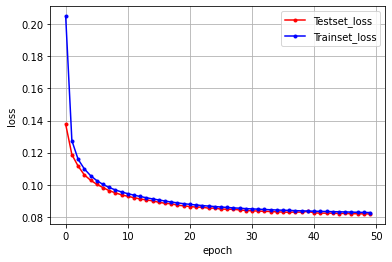

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label = 'Trainset_loss')
plt.legend(loc="upper right")
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

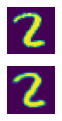

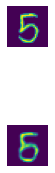

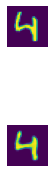

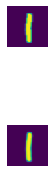

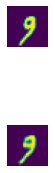

In [ ]:
random_idx = np.random.randint(0,X_test.shape[0],size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))

for i,image_idx in enumerate(random_idx): #랜덤하게 저장된 배열에서 저장된 난수를 가져옴
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28,28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    ax.axis('off')
    
    plt.show()